## Cho dữ liệu titanic trong tập tin titanic_csv.csv
## Yêu cầu: Hãy đọc dữ liệu từ tập tin này, áp dụng Random Forest để thực hiện việc xác định người trên tàu Titanic còn sống hay không dựa trên các thông tin được cung cấp.
### Chi tiết:
1. Đọc dữ liệu. Chuẩn hóa dữ liệu. Từ dữ liệu tạo X gồm các thuộc tính 'pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked', y là 'survived'
2. Tạo X_train, X_test, y_train, y_test từ dữ liệu chuẩn hóa với tỷ lệ dữ liệu test là 0.3
3. Áp dụng Random Forest, Tìm kết quả
4. Kiểm tra độ chính xác
5. Tìm các thuộc tính quan trọng nhất trong tập dữ liệu
6. Trực quan hóa thuộc tính quan trọng
7. Áp dụng lại Random Forest dựa trên các thuộc tính quan trọng, tìm kết quả
8. Kiểm tra độ chính xác
9. Tự cho 1 dữ liệu X_test mới. Ví dụ như: X_test =[[tuoi = 35, gia ve =50, gioi tinh = Male, tang lop = 3], [tuoi = 18, gia ve = 250, gioi tinh = Female, tang lop = 2]], tìm kết quả Y test.

In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import math

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report, roc_auc_score, roc_curve


In [2]:
data = pd.read_csv("../../Data/titanic_csv.csv", index_col=0)

In [3]:
type(data)

pandas.core.frame.DataFrame

In [4]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1309 entries, 1 to 1309
Data columns (total 12 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   pclass     1309 non-null   int64  
 1   survived   1309 non-null   int64  
 2   name       1309 non-null   object 
 3   sex        1309 non-null   object 
 4   age        1046 non-null   float64
 5   sibsp      1309 non-null   int64  
 6   parch      1309 non-null   int64  
 7   ticket     1309 non-null   object 
 8   fare       1308 non-null   float64
 9   cabin      295 non-null    object 
 10  embarked   1307 non-null   object 
 11  home.dest  745 non-null    object 
dtypes: float64(2), int64(4), object(6)
memory usage: 132.9+ KB


In [5]:
data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,home.dest
1,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,"St Louis, MO"
2,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"
5,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,"Montreal, PQ / Chesterville, ON"


In [6]:
data = data.interpolate()

In [7]:
X=data[['pclass', 'sex', 'age', 'sibsp', 'parch', 'fare', 'embarked']] # Features
y=data['survived'] # Labels

In [8]:
X = pd.get_dummies(X)
X.head()

,pclass,age,sibsp,parch,fare,sex_female,sex_male,embarked_C,embarked_Q,embarked_S
1,1,29.0000,0,0,211.3375,1,0,0,0,1
2,1,0.9167,1,2,151.5500,0,1,0,0,1
3,1,2.0000,1,2,151.5500,1,0,0,0,1
4,1,30.0000,1,2,151.5500,0,1,0,0,1
5,1,25.0000,1,2,151.5500,1,0,0,0,1


In [9]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

In [10]:
clf=RandomForestClassifier(n_estimators=100)

In [11]:
clf.fit(X_train,y_train)
y_pred = clf.predict(X_test)

In [12]:
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.7531806615776081


In [13]:
# Kiểm tra độ chính xác
print("The Training prediction accuracy is: ",
clf.score(X_train,y_train)*100,"%")
print("The Testing prediction accuracy is: ",
clf.score(X_test,y_test)*100,"%")
# co cach nao? giai phap nao de ket qua phu hop hon khong?
# (khi train va test chenh nhau nhieu?)

The Training prediction accuracy is:  98.58078602620087 %
The Testing prediction accuracy is:  75.31806615776081 %


## Finding Important Features in Scikit-learn

In [14]:
feature_imp = pd.Series(clf.feature_importances_, index = np.array(X.columns)).sort_values(ascending=False)
feature_imp

age           0.276825
fare          0.248936
sex_female    0.150085
sex_male      0.127140
pclass        0.085489
sibsp         0.043965
parch         0.032755
embarked_C    0.015421
embarked_S    0.014532
embarked_Q    0.004852
dtype: float64

In [15]:
type(feature_imp)

pandas.core.series.Series

In [16]:
feature_imp[feature_imp>=0.05].sum()

0.8884747016435756

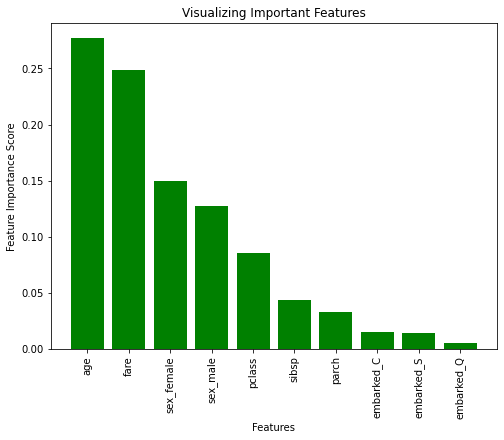

In [17]:
# Creating a bar plot
plt.figure(figsize=(8,6))
plt.bar(feature_imp.index, feature_imp, color="g")
# Add labels to your graph
plt.xlabel('Features')
plt.ylabel('Feature Importance Score')
plt.title("Visualizing Important Features")
plt.xticks(feature_imp.index, rotation='vertical')
plt.show()

In [18]:
# Tạo lại dữ liệu huấn luyện và test sau khi bỏ đi các thuộc tính ít quan trọng h
X_now = X[['age', 'fare', 'sex_female', 'sex_male', 'pclass']]
y_now = data['survived']

In [19]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(X_now, y_now, test_size=0.3)

In [20]:
clf_now=RandomForestClassifier(n_estimators=100)
clf_now.fit(X_train,y_train)
y_pred=clf_now.predict(X_test)

In [21]:
# Model Accuracy, how often is the classifier correct?
# => giảm đôi chút nhưng bỏ được các cột không liên quan
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.8040712468193384


In [22]:
confusion_matrix(y_test, y_pred, labels=[0, 1])

array([[220,  25],
       [ 52,  96]], dtype=int64)

In [23]:
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.90      0.85       245
           1       0.79      0.65      0.71       148

    accuracy                           0.80       393
   macro avg       0.80      0.77      0.78       393
weighted avg       0.80      0.80      0.80       393



In [24]:
y_prob = clf_now.predict_proba(X_test)
y_probs = y_prob[:, 1]
#y_probs

In [25]:
roc_auc_score(y_test, y_probs)

0.8332046332046332

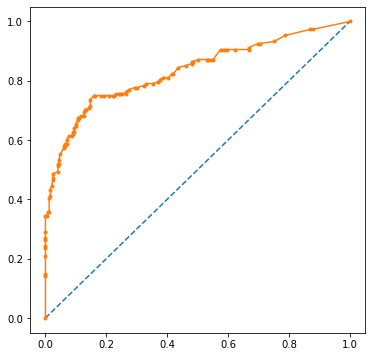

In [26]:
plt.figure(figsize=(6,6))
# calculate roc curve
fpr, tpr, thresholds = roc_curve(y_test, y_probs)
# plot no skill
plt.plot([0, 1], [0, 1], linestyle='--')
# plot the roc curve for the model
plt.plot(fpr, tpr, marker='.')
# show the plot
plt.show()

### Nhận xét:
* Mô hình có Train R^2 cao hơn (0.98) so với Test (0.8) ở cả 2 thử nghiệm: full tính năng và bỏ bớt tính năng 
* ROC AUC score 0.84
* => Mô hình tạm được, nhưng chưa phải là mô hình tốt nhất => Có giải pháp nào không?